In [4]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [5]:
seed = 7
np.random.seed(seed)

In [6]:
df = pd.read_csv('sonar.csv')
df

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
5,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,R
6,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,R
7,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,...,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022,R
8,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040,R
9,0.0039,0.0063,0.0152,0.0336,0.0310,0.0284,0.0396,0.0272,0.0323,0.0452,...,0.0062,0.0120,0.0052,0.0056,0.0093,0.0042,0.0003,0.0053,0.0036,R


In [7]:
dataset = df.values
print(dataset[0])
print(dataset.ndim)
print(dataset.shape)

[0.0453 0.0523 0.0843 0.0689 0.1183 0.2583 0.2156 0.3481 0.3337 0.2872
 0.4918 0.6552 0.6919 0.7797 0.7464 0.9444 1.0 0.8874 0.8024 0.7818 0.5212
 0.4052 0.3957 0.3914 0.325 0.32 0.3271 0.2767 0.4423 0.2028 0.3788 0.2947
 0.1984 0.2341 0.1306 0.4182 0.3835 0.1057 0.184 0.197 0.1674 0.0583 0.1401
 0.1628 0.0621 0.0203 0.053 0.0742 0.0409 0.0061 0.0125 0.0084 0.0089
 0.0048 0.0094 0.0191 0.014 0.0049 0.0052 0.0044 'R']
2
(207, 61)


In [8]:
x = dataset[:,0:60].astype(float)
y = dataset[:,60]
print(x[0])
print(y)
print(x.shape)

[ 0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337
  0.2872  0.4918  0.6552  0.6919  0.7797  0.7464  0.9444  1.      0.8874
  0.8024  0.7818  0.5212  0.4052  0.3957  0.3914  0.325   0.32    0.3271
  0.2767  0.4423  0.2028  0.3788  0.2947  0.1984  0.2341  0.1306  0.4182
  0.3835  0.1057  0.184   0.197   0.1674  0.0583  0.1401  0.1628  0.0621
  0.0203  0.053   0.0742  0.0409  0.0061  0.0125  0.0084  0.0089  0.0048
  0.0094  0.0191  0.014   0.0049  0.0052  0.0044]
['R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 

In [9]:
le = LabelEncoder()
le.fit(y)
y_encode = le.transform(y)
y_encode

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [10]:
from keras import optimizers
def create_baseline():
  network = Sequential()
  network.add(Dense(60, activation='relu', input_shape=(60,)))
  network.add(Dense(1, activation='sigmoid'))
  network.compile(optimizer= optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8), loss='binary_crossentropy', metrics=['acc'])
  return network


In [11]:
estimator = KerasClassifier(build_fn = create_baseline , epochs = 100 , batch_size = 5 , verbose = 0 )
kfold = StratifiedKFold(n_splits = 10 , shuffle = True , random_state = seed)
results = cross_val_score(estimator , x , y_encode , cv = kfold)
print("Results: %2f%%(%2f%%)"%(results.mean()*100,results.std()*100))

Results: 84.902598%(5.311357%)


In [12]:
np.random.seed(seed)
estimators = []
estimators.append(('standardize' , StandardScaler()))
estimators.append(('mlp' , KerasClassifier(build_fn = create_baseline , epochs = 100 , batch_size = 5 , verbose = 0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits = 10 , shuffle = True , random_state = seed)
results = cross_val_score(pipeline , x , y_encode , cv = kfold)
print("Standardized: %2f%%(%2f%%)"%(results.mean()*100,results.std()*100))

Standardized: 86.517317%(3.429468%)


In [13]:
from keras import optimizers
def create_smaller():
  small_network = Sequential()
  small_network.add(Dense(30, activation='relu', input_shape=(60,)))
  small_network.add(Dense(1, activation='sigmoid'))
  small_network.compile(optimizer= optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8), loss='binary_crossentropy', metrics=['acc'])
  return small_network


In [14]:
estimators = []
estimators.append(('standardize' , StandardScaler()))
estimators.append(('mlp' , KerasClassifier(build_fn = create_smaller , epochs = 100 , batch_size = 5 , verbose = 0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits = 10 , shuffle = True , random_state = seed)
results = cross_val_score(pipeline , x , y_encode , cv = kfold)
print("smaller: %2f%%(%2f%%)"%(results.mean()*100,results.std()*100))

smaller: 85.495672%(4.271539%)


In [15]:
from keras import optimizers
def create_larger():
  large_network = Sequential()
  large_network.add(Dense(60, activation='relu', input_shape=(60,)))
  large_network.add(Dense(30, activation='relu'))
  large_network.add(Dense(1, activation='sigmoid'))
  large_network.compile(optimizer= optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8), loss='binary_crossentropy', metrics=['acc'])
  return large_network

In [16]:
estimators = []
estimators.append(('standardize' , StandardScaler()))
estimators.append(('mlp' , KerasClassifier(build_fn = create_larger , epochs = 100 , batch_size = 5 , verbose = 0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits = 10 , shuffle = True , random_state = seed)
results = cross_val_score(pipeline , x , y_encode , cv = kfold)
print("larger: %2f%%(%2f%%)"%(results.mean()*100,results.std()*100))

larger: 83.569265%(8.549879%)


In [17]:
print(x)
print(y_encode)

[[ 0.0453  0.0523  0.0843 ...,  0.0049  0.0052  0.0044]
 [ 0.0262  0.0582  0.1099 ...,  0.0164  0.0095  0.0078]
 [ 0.01    0.0171  0.0623 ...,  0.0044  0.004   0.0117]
 ..., 
 [ 0.0522  0.0437  0.018  ...,  0.0138  0.0077  0.0031]
 [ 0.0303  0.0353  0.049  ...,  0.0079  0.0036  0.0048]
 [ 0.026   0.0363  0.0136 ...,  0.0036  0.0061  0.0115]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [18]:
complete_data = dataset.copy()
np.random.shuffle(complete_data)
data = complete_data[:,0:60].astype('float32')
labels = complete_data[:,60]
le = LabelEncoder()
le.fit(labels)
labels_encode = le.transform(labels).astype('float32')
print(labels_encode)
print(data.shape)
train_data = data[:140]
test_data = data[140:]
train_labels = labels_encode[:140]
test_labels = labels_encode[140:]
print(train_data.shape)
print(test_data.shape)
print(train_labels.shape)
print(test_labels.shape)
print(train_labels[0])

[ 1.  0.  1.  0.  1.  0.  1.  0.  0.  1.  1.  1.  0.  1.  0.  0.  1.  1.
  0.  0.  1.  1.  0.  0.  1.  1.  0.  1.  1.  1.  1.  0.  0.  0.  0.  0.
  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  1.  0.  0.  0.  0.  0.  0.  1.
  0.  0.  1.  1.  1.  1.  1.  1.  0.  0.  1.  0.  0.  0.  0.  1.  1.  0.
  0.  1.  1.  0.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.
  0.  0.  0.  1.  0.  1.  0.  1.  0.  0.  1.  1.  1.  1.  1.  1.  1.  0.
  0.  0.  0.  0.  1.  1.  0.  1.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.
  1.  1.  1.  1.  0.  0.  0.  0.  1.  1.  1.  0.  1.  1.  0.  0.  0.  1.
  1.  0.  1.  0.  0.  0.  1.  1.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.
  0.  1.  0.  1.  0.  0.  1.  0.  0.  1.  0.  1.  0.  1.  0.  0.  0.  0.
  1.  0.  1.  0.  1.  1.  1.  1.  1.  1.  0.  0.  1.  0.  1.  1.  0.  0.
  0.  1.  1.  0.  1.  1.  1.  0.  1.]
(207, 60)
(140, 60)
(67, 60)
(140,)
(67,)
1.0


In [19]:
def build_model():
  network = Sequential()
  network.add(Dense(60, activation='relu',input_shape=(60,)))
  network.add(Dense(60, activation='relu'))
  network.add(Dense(1, activation='sigmoid'))
  network.compile(optimizer = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8), loss='binary_crossentropy', metrics=['acc'])
  return network

In [20]:
k=4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_labels = train_labels[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate(
      [train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],axis=0)
  partial_train_labels = np.concatenate(
      [train_labels[:i * num_val_samples],
       train_labels[(i + 1) * num_val_samples:]],axis=0)
  model = build_model()
  model.fit(partial_train_data, partial_train_labels , epochs=num_epochs, batch_size=1, verbose=0)
  loss , acc = model.evaluate(val_data, val_labels , verbose=0)
  all_scores.append(acc)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [21]:
val_mean_accuracy = np.mean(all_scores)
print(str(val_mean_accuracy*100) + '%')

79.2857143922%


In [22]:
from keras import regularizers
def build_model_0():
  network = Sequential()
  network.add(Dense(60, kernel_regularizer=regularizers.l2(0.001), activation='relu',input_shape=(60,)))
  network.add(Dense(60, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
  network.add(Dense(30, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
  network.add(Dense(1, activation='sigmoid'))
  network.compile(optimizer= optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8), loss ='binary_crossentropy', metrics=['accuracy'])
  return network

In [23]:
k=4
num_val_samples = len(train_data) // k
num_epochs = 20
all_scores = []

for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_labels = train_labels[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate(
      [train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],axis=0)
  partial_train_labels = np.concatenate(
      [train_labels[:i * num_val_samples],
       train_labels[(i + 1) * num_val_samples:]],axis=0)
  model = build_model_0()
  history = model.fit(partial_train_data, partial_train_labels , validation_data=(val_data, val_labels), epochs=num_epochs, batch_size=1, verbose=0)
  fold_loss = history.history['val_loss']
  all_scores.append(fold_loss)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [24]:
average_loss_history = [
np.mean([x[i] for x in all_scores]) for i in range(num_epochs)]
print(average_loss_history)

[0.78533873153584333, 0.72769580015114377, 0.71958903287138265, 0.65450247260076666, 0.58445423612637182, 0.61225762473685397, 0.58287580689149243, 0.54578465409576893, 0.59209788851439948, 0.57940667798476553, 0.57441593179745332, 0.61705793179571633, 0.58115016759506288, 0.52303752159433703, 0.62527975743370401, 0.58410463551325464, 0.58438533815954408, 0.61889267079532151, 0.65387325175106525, 0.56145482685949122]


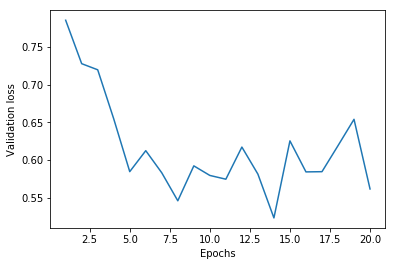

In [25]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_loss_history) + 1), average_loss_history)
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.show()

In [26]:
model = build_model_0()
model.fit(train_data, train_labels,epochs=20, batch_size=5 , verbose=0)

In [27]:
history = model.evaluate(test_data, test_labels)
history

67/67 [==============================] - 1s 19ms/step


[0.48167571647843316, 0.85074626954633803]